In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [5]:
startup = pd.read_csv("C:/Users/DELL/Desktop/Assignment/multiple linear regression/50_Startups.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


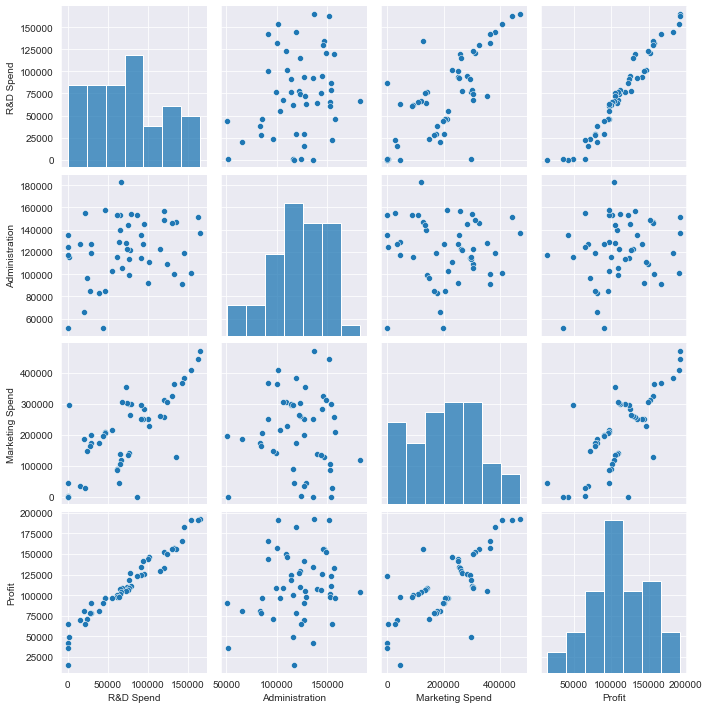

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)

In [10]:
Y = startup["Profit"]
A = startup["R&D Spend"]
B = startup["Administration"]
C = startup["Marketing Spend"]

import statsmodels.formula.api as smf 
model = smf.ols('Y~A+B+C',data=startup).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 05 Sep 2021   Prob (F-statistic):           4.53e-30
Time:                        20:30:00   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
A              0.8057      0.045     17.846      0.000       0.715       0.897
B             -0.0268      0.051     -0.526      0.602      -0.130       0.076
C              0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
print(model.tvalues,'\n', model.pvalues)

Intercept     7.626218
A            17.846374
B            -0.525507
C             1.655077
dtype: float64 
 Intercept    1.057379e-09
A            2.634968e-22
B            6.017551e-01
C            1.047168e-01
dtype: float64


In [12]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

Simple Linear Regression Models

In [13]:
ml_v=smf.ols('Y~A',data = startup).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept    19.320288
A            29.151139
dtype: float64 
 Intercept    2.782697e-24
A            3.500322e-32
dtype: float64


In [14]:
ml_v=smf.ols('Y~B',data = startup).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept    3.040044
B            1.419493
dtype: float64 
 Intercept    0.003824
B            0.162217
dtype: float64


In [15]:
ml_v=smf.ols('Y~A+B',data = startup).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept     9.122352
A            28.588870
B            -1.072677
dtype: float64 
 Intercept    5.695336e-12
A            2.278348e-31
B            2.888932e-01
dtype: float64


In [16]:
rsq_rd = smf.ols('A~B+C',data=startup).fit().rsquared  
vif_rd = 1/(1-rsq_rd) # 16.33

rsq_adm = smf.ols('B~A+C',data=startup).fit().rsquared  
vif_adm = 1/(1-rsq_adm) # 564.98

rsq_mark = smf.ols('C~A+B',data=startup).fit().rsquared  
vif_mark = 1/(1-rsq_mark) #  564.84

# Storing vif values in a data frame
d1 = {'Variables':['A','B','C'],'VIF':[vif_rd,vif_adm,vif_mark]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,A,2.468903
1,B,1.175091
2,C,2.326773


Residual analysis

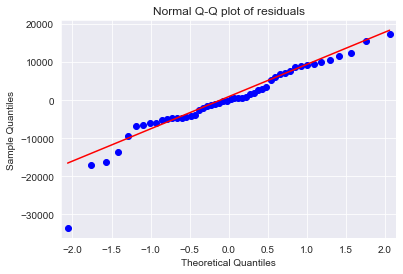

In [17]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [18]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

Residual Plot for Homoscedasticity

In [19]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

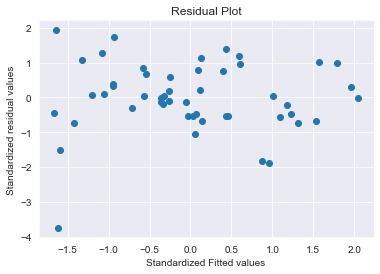

In [20]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Residual Vs Regressors

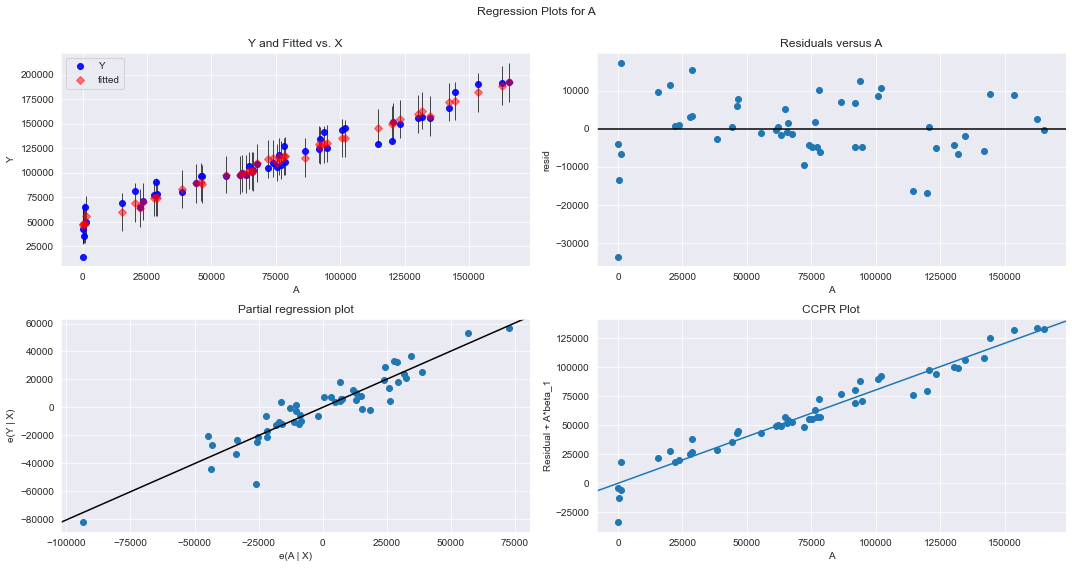

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "A", fig=fig)
plt.show()

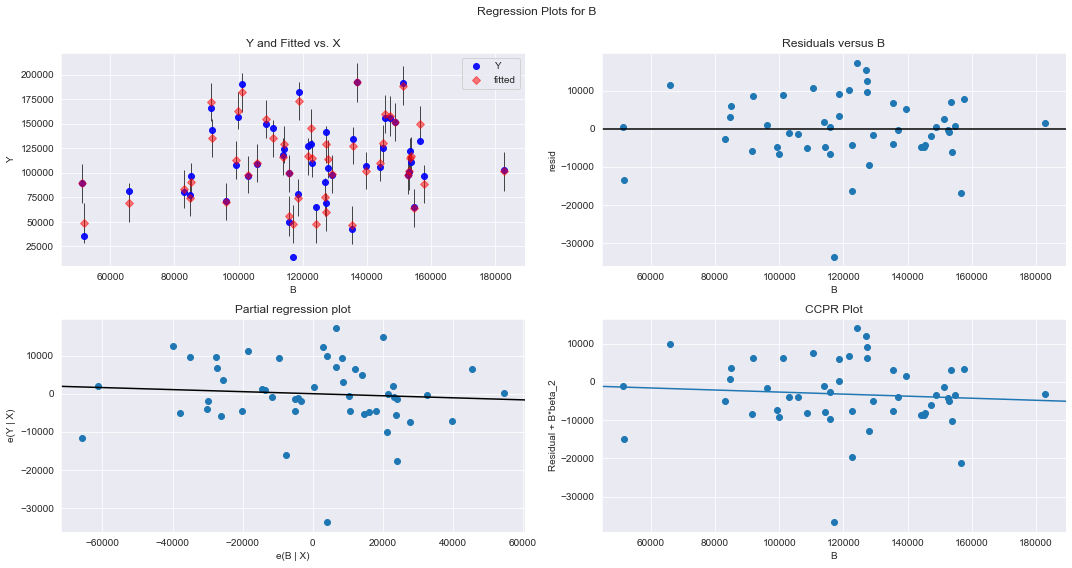

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "B", fig=fig)
plt.show()

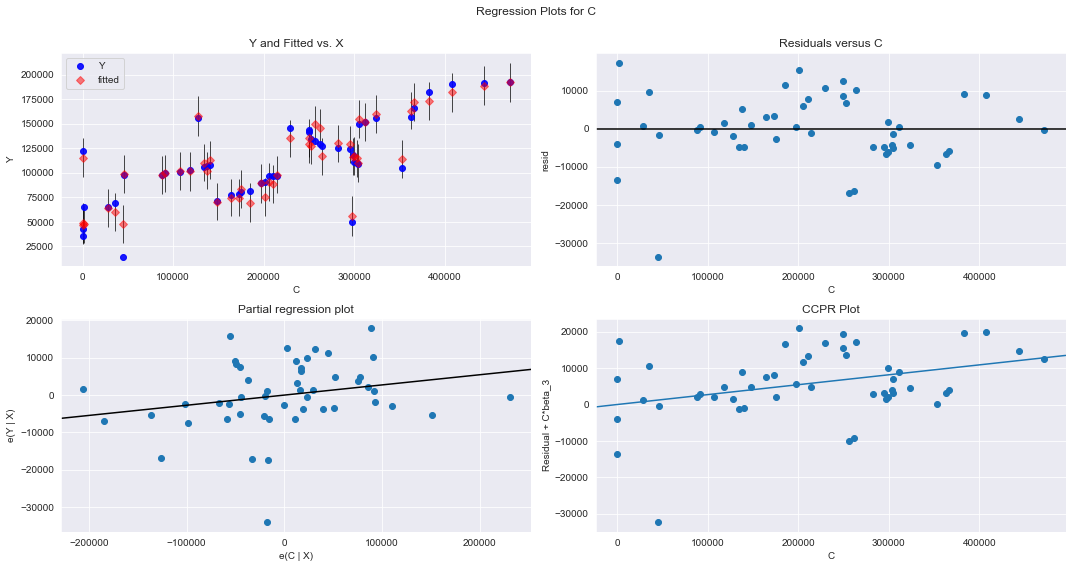

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "C", fig=fig)
plt.show()

Model Deletion Diagnostics
Detecting Influencers/Outliers
Cook’s Distance

In [24]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

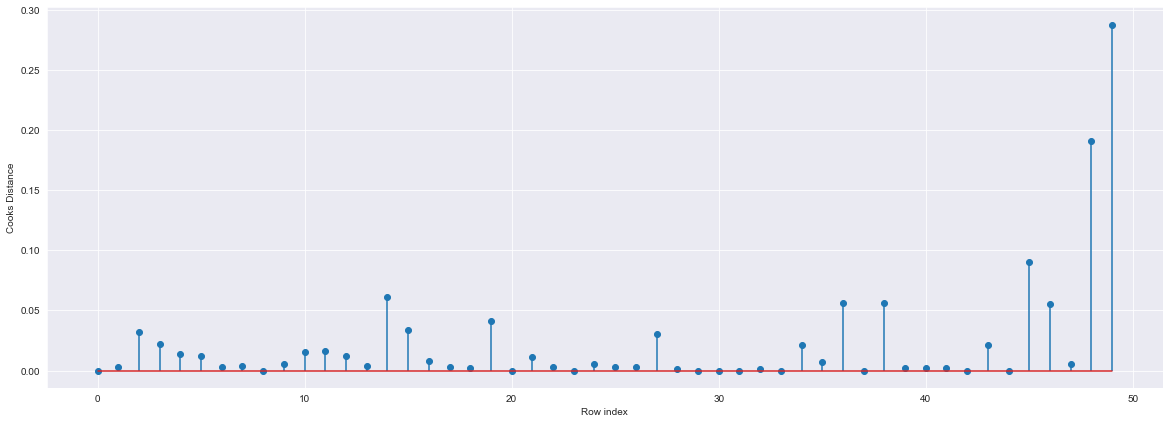

In [25]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [26]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

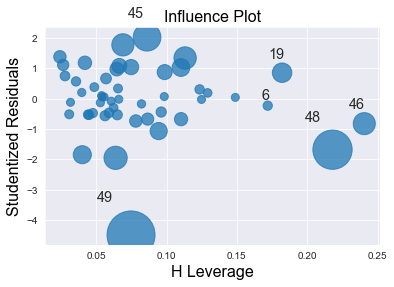

In [27]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [35]:
startup[startup.index.isin([49,48])]
k = startup.shape[1]
n = startup.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [36]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [38]:

startup_new = pd.read_csv("C:/Users/DELL/Desktop/Assignment/multiple linear regression/50_Startups.csv")
startup1=startup_new.drop(startup_new.index[[49,48]],axis=0).reset_index()

In [39]:
startup1=startup1.drop(['index'],axis=1)


In [40]:
startup1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [41]:
P = startup1["Profit"]
Q = startup1["R&D Spend"]
R = startup1["Administration"]
S = startup1["Marketing Spend"]
import statsmodels.formula.api as smf 
model = smf.ols('P~Q+R',data=startup1).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      P   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     559.7
Date:                Sun, 05 Sep 2021   Prob (F-statistic):           1.62e-32
Time:                        20:37:27   Log-Likelihood:                -494.17
No. Observations:                  48   AIC:                             994.3
Df Residuals:                      45   BIC:                             1000.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.273e+04   5182.210     12.106      0.000    5.23e+04    7.32e+04
Q              0.8229      0.025     33.245      0.000       0.773       0.873
R             -0.0837      0.041     -2.041      0.047      -0.166      -0.001
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.396
Skew:                           0.073   Prob(JB):                        0.820
Kurtosis:                       2.580   Cond. No.                     7.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
model_influence_V = model.get_influence()
(c_V, _) = model_influence_V.cooks_distance

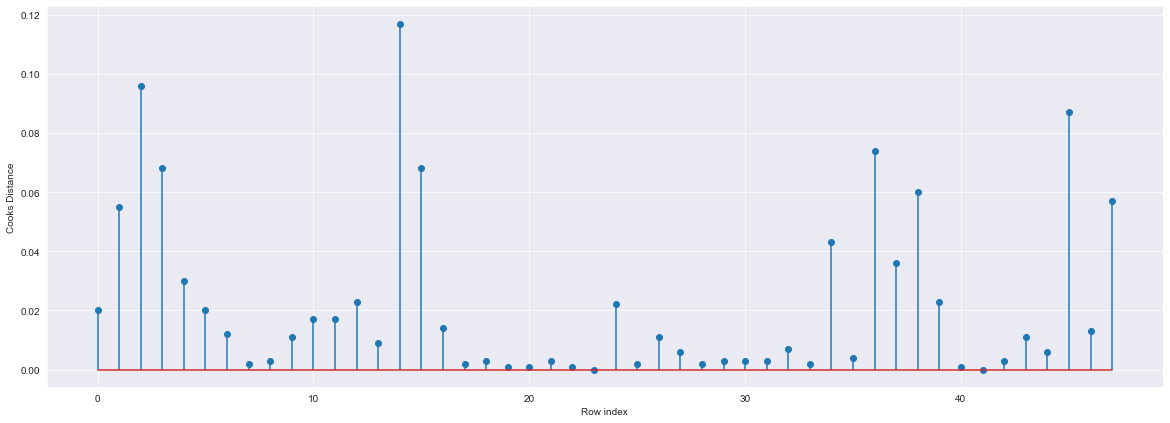

In [48]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [49]:
new_data=pd.DataFrame({'Q':40,"R":95,"S":102},index=[1])

In [50]:
new_data

,Q,R,S
1,40,95,102


In [53]:
model.predict(new_data)

1    62759.662573
dtype: float64